# Problem statement

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team.

To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.

Requirement/Constraint: There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

# 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding The Data

In [2]:
fifa = pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
data = pd.read_csv('fifa_ variable_information.csv')
data.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [4]:
data

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

# Data preprocessing
* Drop any columns that you deem unnecessary for analysis.
* Clean and replace missing data before analyzing.

# 2. Dropping irrelevant columns

In [6]:
fifa.drop(['Photo','Flag','Club Logo','Jersey Number'],axis=1,inplace=True)

In [7]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# 3. Further Cleaning:

Three major approached can be followed here:

* Null check/Invalid data: Handling missing or inappropriate data.
* Format issue: Checking if the values are in appropriate format.
* Type check: Column should have the expected datatype.

In [8]:
fifa.isnull().sum().sort_values(ascending = False)

Loaned From                 16943
Release Clause               1564
Joined                       1553
Contract Valid Until          289
Club                          241
Position                       60
International Reputation       48
Crossing                       48
FKAccuracy                     48
GKReflexes                     48
Dribbling                      48
Volleys                        48
ShortPassing                   48
HeadingAccuracy                48
Finishing                      48
Weight                         48
Weak Foot                      48
Height                         48
BallControl                    48
Preferred Foot                 48
Body Type                      48
Work Rate                      48
Skill Moves                    48
LongPassing                    48
Curve                          48
Acceleration                   48
Positioning                    48
GKPositioning                  48
GKKicking                      48
GKHandling    

## Loaned From

In [9]:
fifa['Loaned From']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18202    NaN
18203    NaN
18204    NaN
18205    NaN
18206    NaN
Name: Loaned From, Length: 18207, dtype: object

In [10]:
fifa['Loaned From'].isnull().sum()/len(fifa)*100 #93% of the data is missing from Loaned From

93.05761520294392

#### Approach

It has high number(93%) of missing values and replacing wih a valid might not help attaining good results, so removing the whole column as such.

In [11]:
fifa.drop(['Loaned From'],axis=1,inplace=True)

In [12]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Value & Wage Columns:

In [13]:
fifa[['Value','Wage']].head(10)

,Value,Wage
0,€110.5M,€565K
1,€77M,€405K
2,€118.5M,€290K
3,€72M,€260K
4,€102M,€355K
5,€93M,€340K
6,€67M,€420K
7,€80M,€455K
8,€51M,€380K
9,€68M,€94K


### Approach

* Value & Wage values are amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
* Check if all the columns are having € and get rid of it.
* Replace each 'K' or 'M' with respective 1000 or 1000000 values.

In [14]:
def clean(x):
    x = str(x)
    if '€' in x:
        x = x.replace('€','')
    if "M" in x:
        x = x.replace('M','')
        x = str(float(x) * 1000000)
    if "K" in x:
        x = x.replace('K','')
        x = str(float(x)*1000)
    return x

In [15]:
fifa['Value']=fifa['Value'].apply(clean)

In [16]:
fifa['Value']=pd.to_numeric(fifa['Value'])

In [17]:
fifa['Wage']=fifa['Wage'].apply(clean)

In [18]:
fifa['Wage']=pd.to_numeric(fifa['Wage'])

In [19]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [20]:
pd.concat([fifa['Value'],fifa['Wage']],axis=1)

,Value,Wage
0,110500000.0,565000.0
1,77000000.0,405000.0
2,118500000.0,290000.0
3,72000000.0,260000.0
4,102000000.0,355000.0
...,...,...
18202,60000.0,1000.0
18203,60000.0,1000.0
18204,60000.0,1000.0
18205,60000.0,1000.0


## Release Clause

In [21]:
fifa["Release Clause"].head()

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

In [22]:
fifa["Release Clause"].isnull().sum()

1564

In [23]:
fifa["Release Clause"].isnull().sum()/len(fifa)*100 #only 8% data is missing 

8.590102707749766

In [24]:
fifa["Release Clause"]=fifa["Release Clause"].apply(clean)

In [25]:
fifa["Release Clause"].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: object

In [26]:
fifa["Release Clause"]=fifa["Release Clause"].astype(float)

In [27]:
fifa["Release Clause"].describe()

count    1.664300e+04
mean     4.585061e+06
std      1.111872e+07
min      1.300000e+04
25%      5.250000e+05
50%      1.100000e+06
75%      3.500000e+06
max      2.281000e+08
Name: Release Clause, dtype: float64

In [28]:
fifa["Release Clause"]=fifa["Release Clause"].fillna(fifa["Release Clause"].mean())

In [29]:
fifa["Release Clause"].isnull().sum()

0

### Approach

* Release Clause can be processed similar to Value and Wage
* Almost 91% of the entries are not null hence replacing with a meaningful value (Median or mean) will be a good option.

## Joined

In [30]:
fifa['Joined'].isnull().sum()

1553

In [31]:
fifa['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [32]:
fifa['Joined']= pd.to_datetime(fifa['Joined'])

In [33]:
fifa['Joined_Year']=fifa['Joined'].apply(lambda x : x.year)

In [34]:
fifa['Joined_Year'].describe()

count    16654.000000
mean      2016.459829
std          2.105924
min       1991.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2018.000000
Name: Joined_Year, dtype: float64

In [35]:
fifa['Joined_Year']=fifa['Joined_Year'].fillna(fifa['Joined_Year']).mean()

In [36]:
fifa['Joined_Year'].isnull().sum()

0

In [37]:
fifa.drop(['Joined'],axis=1,inplace=True)

### Approach
* Since we dont require the exact date in this scenario, changing the formatting of the Date to year only format.
* There are a few NaN values, replacing with a meaningful value (Median or mean) will be a good option.

## Contract Valid Until

In [38]:
fifa['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

In [39]:
fifa['Contract Valid Until'].dtype #data type is object

dtype('O')

In [40]:
# Converting to datatime format
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])

In [41]:
fifa['Contract Valid Until'].dtype

dtype('<M8[ns]')

In [42]:
fifa['Contract Valid Until'].isnull().sum()

289

In [43]:
fifa['Contract Valid Until']=fifa['Contract Valid Until'].apply(lambda x : x.year)

In [44]:
fifa['Contract Valid Until'].describe()

count    17918.000000
mean      2020.146668
std          1.294468
min       2018.000000
25%       2019.000000
50%       2020.000000
75%       2021.000000
max       2026.000000
Name: Contract Valid Until, dtype: float64

In [87]:
fifa['Contract Valid Until']=fifa['Contract Valid Until'].fillna(2020)

In [88]:
fifa['Contract Valid Until'].isnull().sum()

0

### Approach
* Some entries are null hence replacing with a mean will be a good option.
* Converting type of column to date time.

## Height

In [47]:
fifa.Height

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [48]:
def h(x):
    x=str(x)
    if "'" in x:
        x=x.replace("'",".")
    return x
    


In [49]:
fifa['Height']=fifa.Height.apply(h)
fifa['Height']

0         5.7
1         6.2
2         5.9
3         6.4
4        5.11
         ... 
18202     5.9
18203     6.3
18204     5.8
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: object

In [56]:
fifa['Height']=fifa['Height'].astype(float)
fifa['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [57]:
fifa['Height'].isnull().sum()

48

In [58]:
fifa['Height'].describe()

count    18159.000000
mean         5.797367
std          0.448232
min          5.100000
25%          5.110000
50%          5.900000
75%          6.100000
max          6.900000
Name: Height, dtype: float64

In [59]:
fifa['Height']=fifa['Height'].fillna(5.79)

In [60]:
fifa['Height'].isnull().sum()

0

### Approach

* Some entries are null hence replacing with a mean will be a good option.
* Removing ' to .(qutation mark)
* Coverting data type from object to float

## Weight

In [63]:
fifa['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [64]:
# Removing 'lbs'
def suffix(x):
    x=str(x)
    if 'lbs' in x:
        x = x.replace('lbs','')
    return x

In [65]:
fifa['Weight']=fifa['Weight'].apply(suffix)
fifa['Weight'].head()

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: object

In [66]:
fifa['Weight']=fifa['Weight'].astype(float)

In [67]:
fifa['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [68]:
fifa['Weight']=fifa['Weight'].fillna(fifa['Weight']).mean()

In [69]:
fifa['Weight'].isnull().sum()

0

### Approach
* Some entries are null hence replacing with a mean will be a good option.
* Remove the suffix and convert to float

# 4. Exploratory Analysis:

## 4.1.	Plot the distribution of Overall rating for all players. 

In [70]:
data

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


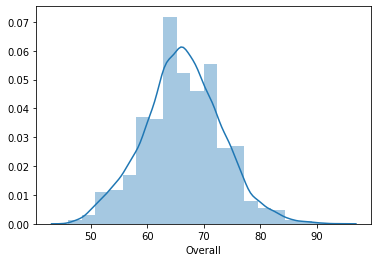

In [71]:
sns.distplot(fifa.Overall,bins=20)
plt.show()

## 4.2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [72]:
column = ['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']

In [73]:
fifa.loc[:,column].dtypes

Overall                       int64
Value                       float64
Wage                        float64
International Reputation    float64
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

<Figure size 720x576 with 0 Axes>

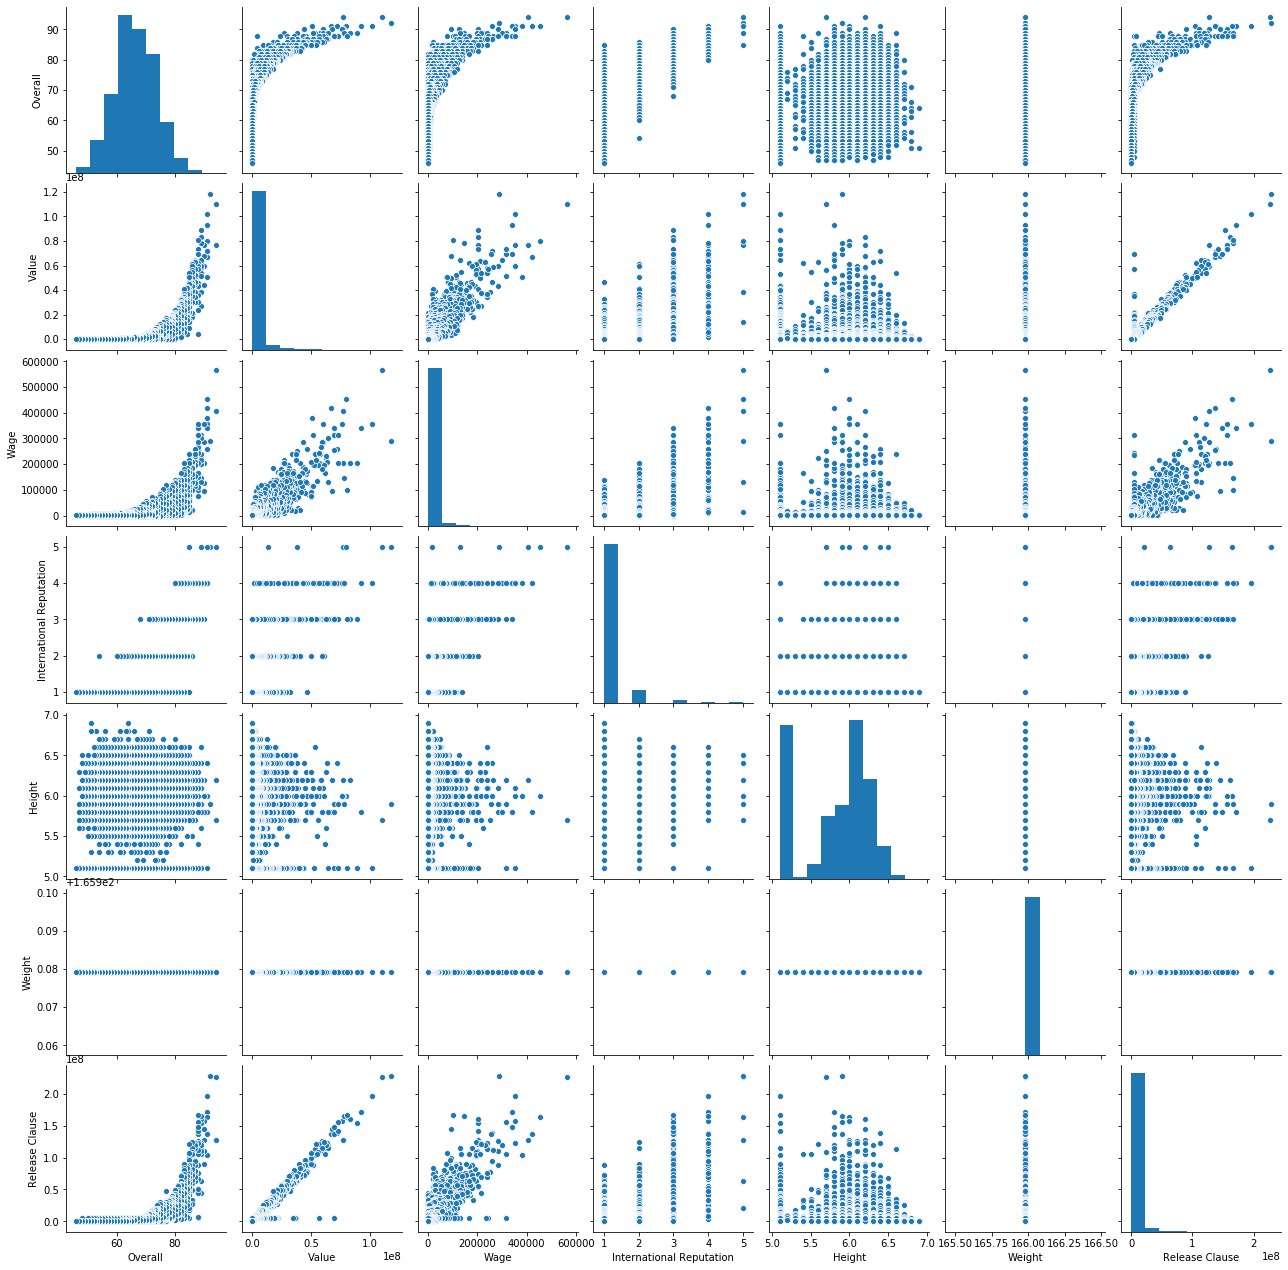

In [78]:
plt.figure(figsize=[10,8])
sns.pairplot(fifa.loc[:,column])
plt.show()

## 5.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.



In [79]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_Year
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2016.459829
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2016.459829
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2016.459829
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2016.459829
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2016.459829


In [197]:
t20 = fifa.query('`Contract Valid Until` == 2020').sort_values(by='Overall',ascending=False).head(20)
t20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_Year
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2016.459829
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2016.459829
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2016.459829
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2016.459829
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2016.459829
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,2016.459829
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,2016.459829
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,2016.459829
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0,2016.459829
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0,2016.459829


## 5.a:	What would the average wage for this set of players be?

In [110]:
t20['Wage'].mean()

205450.0

## 5.b:	What is the average age?

In [114]:
fifa['Age'].mean() #average age of whole the data

25.122205745043114

In [115]:
t20['Age'].mean() #average age of top 20 players

30.65

## 5.c:	Is there a correlation between the Overall rating and Value for these players?

In [117]:
np.corrcoef(t20.Overall,t20.Value)

array([[1.       , 0.7867166],
       [0.7867166, 1.       ]])

#### There is a high correlation (78%) between the Overall rating and Value

## 6. Generate tables containing the top 5 players by Overall rating for each unique position.

In [118]:
fifa.Position

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [152]:
t5=fifa.groupby('Position')[['Position','Overall']].head(5)

In [157]:
t5.sort_values(by=['Position','Overall'],ascending=[True,False])

,Position,Overall
17,CAM,89
31,CAM,88
61,CAM,86
66,CAM,86
74,CAM,86
...,...,...
5018,NaN,70
6736,NaN,68
7922,NaN,67
9905,NaN,66


## 6.a:	Are there any players appearing in more than one Table. Please point out such players.

In [173]:
name=fifa.Name.value_counts()
pd.DataFrame(name[name>1])

,Name
J. Rodríguez,11
Paulinho,8
J. Williams,7
R. Williams,7
J. Gómez,6
...,...
Lee Keun Ho,2
J. Herrera,2
L. Maniero,2
C. Rojas,2


## 6.b:	What is the average wage one can expect to pay for the top 5 in every position?

In [185]:
a=fifa.sort_values(by='Overall',ascending=False)

In [186]:
t=a.groupby('Position')['Wage'].mean()
t

Position
CAM    10229.645094
CB      7704.724409
CDM     9315.400844
CF     10216.216216
CM      8340.746055
GK      6803.950617
LAM    26142.857143
LB      8726.928896
LCB    11498.456790
LCM    14131.645570
LDM    11860.082305
LF     44666.666667
LM      9656.621005
LS     15260.869565
LW     13068.241470
LWB     9076.923077
RAM    19095.238095
RB      8604.182804
RCB    12688.821752
RCM    14404.092072
RDM    12149.193548
RF     52687.500000
RM      9540.925267
RS     14379.310345
RW     14432.432432
RWB     8597.701149
ST      9938.197026
Name: Wage, dtype: float64

# Final Report:

* Accrording to top 20 whose contract got expired in 2020 is De Gea.
* Average age of top 20 players is 20.
* Average Wage of top 20 Players is 205450.
* L.Messi and Christano Ronaldo have heighest Overall rating according to the original data set.
* Average Wage of top 5 Players in every position is 10229.64.
* Correlation between the Overall rating and Value for top 20 player is 78%